# Predicting Myopia

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Import the Data and show dataframe
file_path = Path("C:/Users/anico/Desktop/boot_camp_work/Challenges/UnsupervisedML/unsupervised-machine-learning-challenge/myopia.csv")
df = pd.read_csv(file_path)
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


## Prepare the data
* Remove "MYOPIC" column
* Standardize dataset so that columns that contain larger values do not influence the outcome

In [3]:
#remove MYOPIC column
new_df = df.drop(["MYOPIC"], axis='columns')
new_df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize data using scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

In [5]:
# Name resulting DataFrame X
X = scaled_data
X

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

## Apply Dimensionality Reduction

Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3.

For this assignment, preserve 90% of the explained variance in dimensionality reduction.


In [6]:
# Perform dimensionality reduction with PCA. 
# How did the number of features change?

#initialize PCA model
pca = PCA(n_components=0.90)

myopia_pca = pca.fit_transform(X)

#transfrom pca data into a dataframe
df_myopia_pca = pd.DataFrame(
    data=myopia_pca)
df_myopia_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


After performing dimensionality reduction with PCA (and preserving 90% of the explained variance), the number of features went from 14 to 10.

In [7]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results
# run t-SNE on the principal components (the output of the PCA transformation)
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_pca)

C:\Users\anico\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [8]:
tsne_features.shape

(618, 2)

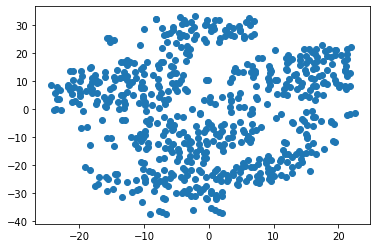

In [11]:
# Create a scatter plot of the t-SNE output. 
# Are there disctint clusters?
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])

plt.savefig("Output/Fig01.png")
plt.show()



No, there are no distinct clusters.

## Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters

C:\Users\anico\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


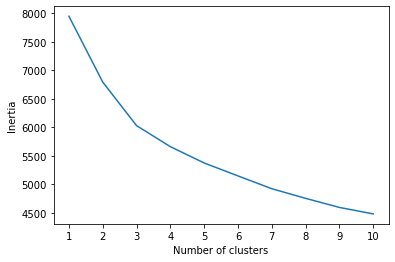

In [12]:
# use a for loop to determine the inertia for each k between 1-10
# If possible, determine where the elbow of the plor is, and a which value of k it appears

# Identify the best number of clusters using the elbow curve
inertia = []

k = list(range(1,11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.savefig("Output/Fig02.png")
plt.show()



## Recommendation
State a brief conclusion on wheter patients can be clustered together, how many clusters, and support it with findings

Based on the models, it does not appear that patients can be clustered apporpriately to better prediect myopia. After performing the PCA here are still a large numer of features that contribute to the variance. Additionally, after running t-SNE on the prinicpal components there are no clear clusters shown in the data. Finally, after running the K-means model, the plot does not show a clear elbow to point out if any groups exist in the data.